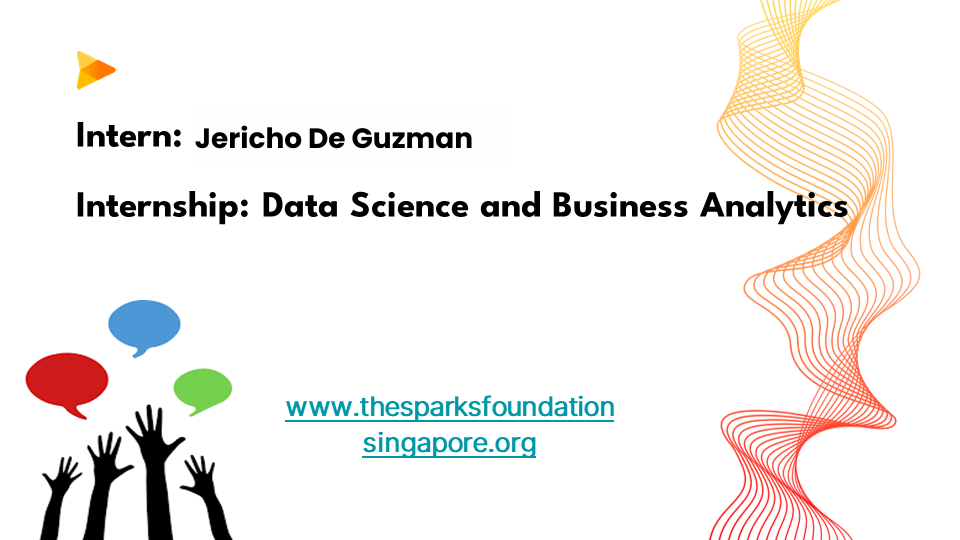

In [2]:
from IPython.display import Image
Image('TSF1.png')

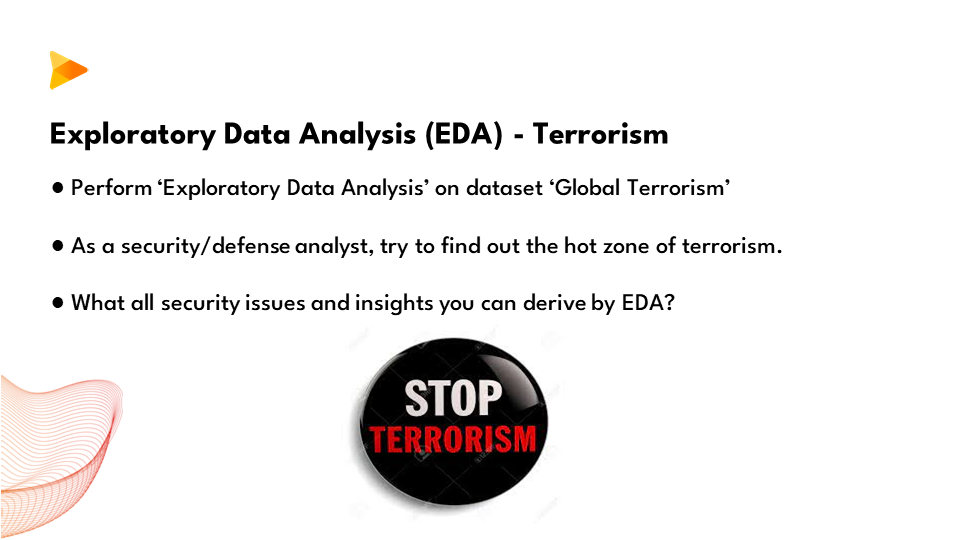

In [3]:
Image('TSF2.png')

# What is EDA ?

EDA stands for Exploratory Data Analysis. It is the process of analyzing and understanding data sets to summarize their main characteristics and gain insights into the underlying patterns, relationships, and trends. EDA typically involves methods such as data visualization, summary statistics, and hypothesis testing, and is often used as a precursor to more advanced analysis techniques. The goal of EDA is to gain a deeper understanding of the data and uncover any interesting or important information that may be hidden within it.

# Import the necessary Python libraries that will be going to used for Data Wrangling and Visulalization.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
from wordcloud import WordCloud

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50000)

# Importing the Global Terrorism Data

In [5]:
terrorism_data = pd.read_csv('global_terrorism_data.csv', encoding='Windows-1252')

C:\Users\goldd\AppData\Local\Temp\ipykernel_10540\2713755978.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_data = pd.read_csv('global_terrorism_data.csv', encoding='Windows-1252')


In [6]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

# Data Preprocessing

In [7]:
terrorism_data.shape

(181691, 135)

In [8]:
terrorism_data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [9]:
tf_data = terrorism_data[['iyear', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'target1', 'nkill', 'nwound']]
tf_data.head()

,iyear,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,nkill,nwound
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN


In [10]:
cols = ['nkill', 'nwound']

for col in cols:
    tf_data[col] = tf_data[col].fillna(0)

tf_data.head()

C:\Users\goldd\AppData\Local\Temp\ipykernel_10540\3283111311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_data[col] = tf_data[col].fillna(0)


,iyear,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,nkill,nwound
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0.0,0.0
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0,0.0


In [11]:
tf_data['ncasualties'] = tf_data['nkill'] + tf_data['nwound']
tf_data.head()

C:\Users\goldd\AppData\Local\Temp\ipykernel_10540\1305609146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_data['ncasualties'] = tf_data['nkill'] + tf_data['nwound']


,iyear,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,nkill,nwound,ncasualties
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,1.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0,1.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0.0,0.0,0.0
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0,0.0,0.0


In [12]:
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   country_txt      181691 non-null  object 
 2   region_txt       181691 non-null  object 
 3   city             181256 non-null  object 
 4   latitude         177135 non-null  float64
 5   longitude        177134 non-null  float64
 6   attacktype1_txt  181691 non-null  object 
 7   targtype1_txt    181691 non-null  object 
 8   target1          181053 non-null  object 
 9   nkill            181691 non-null  float64
 10  nwound           181691 non-null  float64
 11  ncasualties      181691 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 16.6+ MB


# Perform EDA

In [13]:
tf_data['ncasualties'].describe()

count    181691.000000
mean          5.150156
std          40.555416
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9574.000000
Name: ncasualties, dtype: float64

# Regions with Most Terrorist Attacks


In [14]:
# Count the number of terrorist attacks per region

region_attacks = tf_data['region_txt'].value_counts()

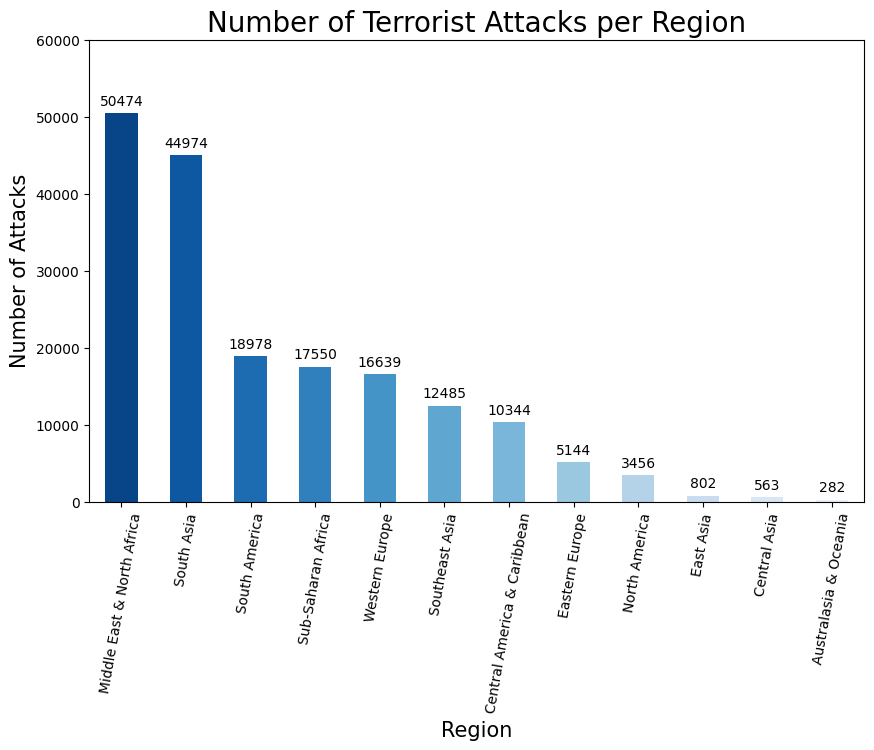

In [15]:
# Calculate the number of attacks per region
region_attacks = tf_data.groupby('region_txt').size()

# Sorting from Highest to Lowest terrorist attacks for each region
region_attacks_sorted = region_attacks.sort_values(ascending=False)

# Creating a sequential color palette
color = sns.color_palette('Blues_r', len(region_attacks_sorted))

ax = region_attacks_sorted.plot(kind='bar', figsize=(10, 6), color=color)

plt.title('Number of Terrorist Attacks per Region', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=80)
ax.set_ylim(0, 60000)

# Add annotations
for i, v in enumerate(region_attacks_sorted):
    ax.text(i, v + 1000, str(v), color='black', fontsize=10, ha='center')

# Show the plot 
plt.show()

# Heatmap for the number of Terrorist Attack in each Country per Year


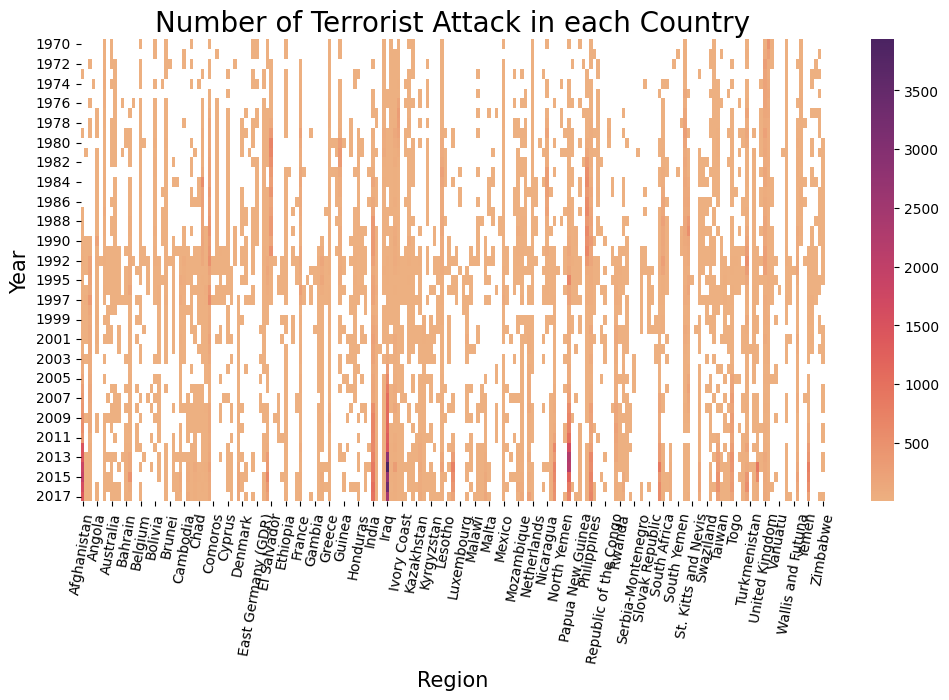

In [16]:
#   Filter necesarry columns
yearly_terror_attack = tf_data.groupby(['iyear', 'country_txt'])[['iyear', 'country_txt']].value_counts().reset_index(name='counts')

t2_df = yearly_terror_attack.pivot(index='iyear', columns='country_txt', values='counts')

color = sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(data=t2_df, cmap=color, cbar=True)
plt.title('Number of Terrorist Attack in each Country', fontsize=20)
plt.xlabel('Region', fontsize = 15)
plt.xticks(rotation=80)
plt.ylabel('Year', fontsize = 15)
plt.show()

 # Terrorism Hotspots by Country 

In [17]:
#  the data by country and the count of the terrorism attacks.
hotspots_by_country = tf_data.groupby(['country_txt']).size().reset_index(name='counts')

# Creating a chloropleth map 
fig = px.choropleth(hotspots_by_country, color="counts",
                    locations="country_txt", locationmode='country names',
                    color_continuous_scale='Blues', title='Terrorism Hotspots by Country'
                   )

fig.update_layout(title_x=0.5, title_font_size=25)

# Adding Annotations
annotations = []
for geo in fig['data'][0]['locations']:
    annotations.append(dict(x=hotspots_by_country[hotspots_by_country['country_txt'] == geo]['counts'].index[0],
                            y=hotspots_by_country[hotspots_by_country['country_txt'] == geo]['counts'].values[0],
                            text=str(hotspots_by_country[hotspots_by_country['country_txt'] == geo]['counts'].values[0]),
                            showarrow=False))
    
fig.update_layout(annotations=annotations)

fig.show()

# Top 10 City Attacks

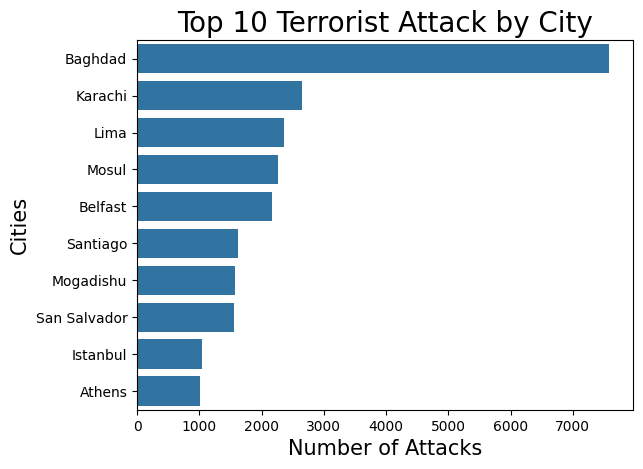

In [18]:
city = tf_data[tf_data['city'] != 'Unknown']
city_attacks = city.groupby('city')['city'].size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

sns.barplot(data=city_attacks, x='counts', y='city')

plt.title('Top 10 Terrorist Attack by City', fontsize=20)
plt.xlabel('Number of Attacks', fontsize=15)
plt.ylabel('Cities', fontsize=15)

plt.show()

# Most Target Types by Terrorist Attacks

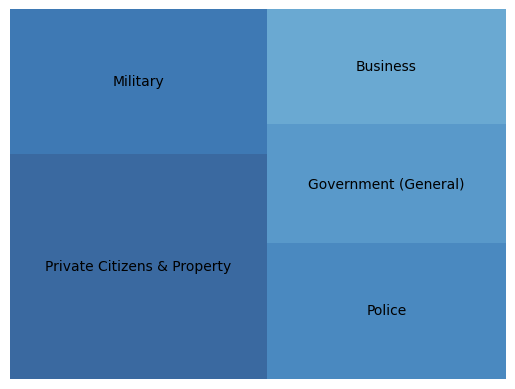

In [19]:
import squarify

target_types = tf_data.groupby('targtype1_txt')['targtype1_txt'].size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(5)

# Create the treemap
color = sns.color_palette('Blues_r', len(region_attacks_sorted))
squarify.plot(sizes=target_types['counts'], label=target_types['targtype1_txt'], alpha=.8, color=color)
plt.axis('off')
plt.show()

# Time Series of Terrorist Attacks per Year

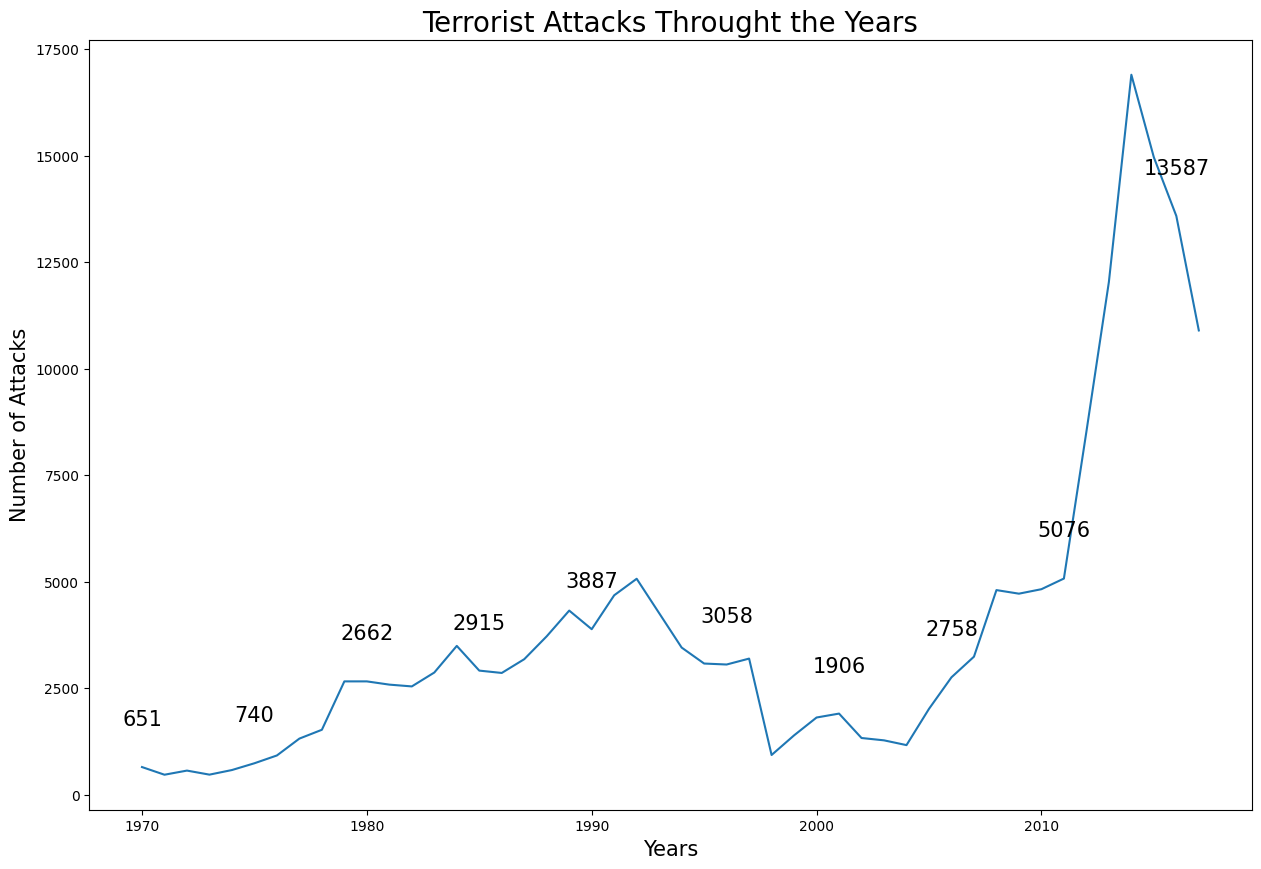

In [33]:
attacks_per_year = tf_data.groupby('iyear')['iyear'].size().reset_index(name='counts')

# Create a line plot
plt.figure(figsize=(15, 10))
sns.lineplot(x='iyear', y='counts', data=attacks_per_year)
plt.title('Terrorist Attacks Throught the Years', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)

# Annotations
for i, row in attacks_per_year.iterrows():
    year = row['iyear']
    count = row['counts']

    if i % 5 == 0:
        plt.annotate(count, (year, count), textcoords="offset points", xytext=(0,30), ha='center', fontsize=15)

plt.show()

# The Most Type of Attacks that Occur.

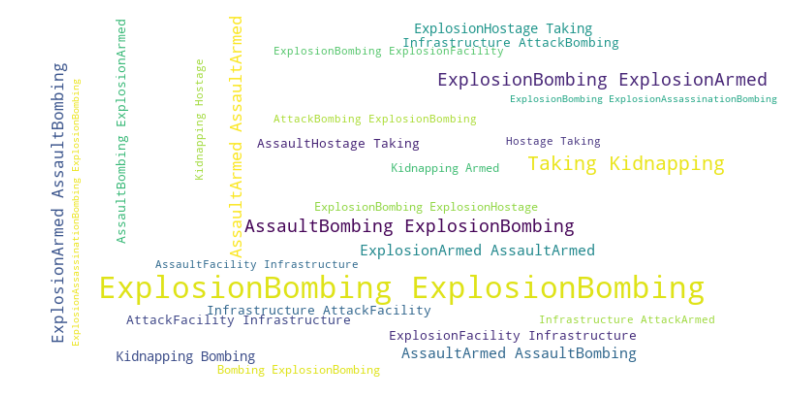

In [45]:
# Concatenate all the Attack Types
attacks = ''.join(tf_data['attacktype1_txt'])

# Making a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(attacks)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Insights Gain from the Global Terrorism Dataset!

<p>1. The region that Attacks the Terrorist the most is the <strong>Middle East</strong> and <strong>North Africa</strong>. It is recorded the hightest attacks all over the years.</p>
<p>2. The region <strong>Iraq</strong> and it's capital city <strong>Bhagdad</strong> has the most common terrorists attacks this past few years. It has a record of 24.263k terrorist attacks through the years.</p>
<p>3. The Terrorist Attacks starts to increase starting from the year <strong>2004</strong> up to <strong>2017</strong>.</p>
<p>4. The type of terrorist attack that is recorded in the <strong>Bombing Explosion Attack</strong>.</p>
<p>5. The most target of the terrorist based on the data is the <strong>Private Citizens</strong> and <strong>Properties</strong>.</p>

# Recommendations

<p>1. The regions Middle East and North Africa needs to address the causes of the terrorist attacks. Poverty, equality and lack of opportunities are one of many reasons that can affect the attacks. Addressing this issues though economic development and social programs can help to lower the terrorists attacks.</p>
<p>2. The country Iraq especially its capital Bhagdad needs to improve their counterterrorism measures. Investing in intelligence and law enforcement can help to prevent attacks before they happen. The country also can strengthen their security borders to prevent terrorists movements. Lastly the country can ally with the different countries with power so they can gain power to prevent terrorist attacks.
<p>The increasing of terrorist attacks from 2024 to 2017 means that the terrorists group become active throughout the years.</p>
<p>Bombing Explosion Attack is the most attacks that has been recorded in 2004 to 2017. There are several preventive measures that can be implemented to mitigate the impact of such attacks. First is access control and security screening in public places. Next is use of bomb detection technologies and regular security audits and vulnerability assessments. Lastly, perform a emergency response plan incase of the attack.</p>
<p>The targets that terrorist attacks is the Private Citizens and Properties. The country need to make sure that their citizens and people have awareness in terms of terrorists attacks. They can conduct seminars and other events to make the citizens and people aware.</p>